In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['font.size']=12
matplotlib.rcParams['axes.unicode_minus'] = False

In [69]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [70]:
# 1.deck 컴럼을 삭제하고 나이(age)의 nan 데이터를 삭제 하시요
titanic.drop(columns='deck', inplace=True)
titanic.dropna(subset=['age'], inplace=True)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,Cherbourg,yes,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,Southampton,yes,False


In [71]:
# 2.생존자와 사망자에 대한 갯수를 구하시요
titanic[ titanic['survived'] == 0 ]['survived'].count()

424

In [72]:
# 2.생존자와 사망자에 대한 갯수를 구하시요
titanic[titanic['survived'] == 1]['survived'].count()

290

In [73]:
# 3.등급별(pclass) 평균 생존률을 구하시요
titanic.groupby('pclass').mean()['survived']

pclass
1    0.655914
2    0.479769
3    0.239437
Name: survived, dtype: float64

In [74]:
# 4. SibSp(가족과탑승) 의 평균 생존율을 구하시요
titanic[ titanic['sibsp'] != 0 ].mean()['survived']

0.4732510288065844

In [75]:
# 5. 혼자탑승(alone)한 인원의 평균 생존율을 구하시요
titanic[ titanic['alone'] == True ].mean()['survived']

0.3217821782178218

In [76]:
# 6.성별 평균 생존율을 구하시요 
titanic.groupby('sex').mean()['survived']

sex
female    0.754789
male      0.205298
Name: survived, dtype: float64

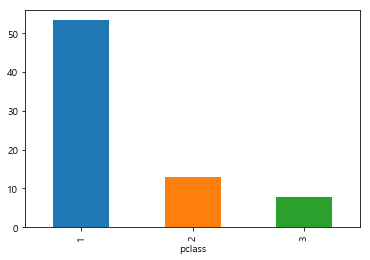

In [77]:
# 7.등급별 티켓비용(fare) 의 평균 차트로 그리시요
# titanic['fair_each'] = titanic['fare'] / (titanic['sibsp'] + titanic['parch'] + 1)
# titanic.groupby('pclass').mean()['fair_each'].plot(kind='bar')
# plt.show()
titanic.groupby('pclass').mean()['fare'].plot(kind='bar')
plt.xlabel('등급')
plt.ylabel('티켓비용평균')
plt.show()

In [78]:
# 8.나이분류 컬럼을 추가하시요 
# 9.1~15(미성년자), 15~25(청년), 25~35(중년), 35~60(장년), 60~(노년)  으로 표시하시요.
def fn(v):
    if 1<v<=15:
        return "미성년자"
    elif 15<v<=25:
        return "청년"
    elif 15<v<=35:
        return "중년"
    elif 35<v<=60:
        return "장년"
    elif 60<v:
        return "노년"    
titanic['나이분류'] = titanic['age'].apply(fn)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,fair_each,나이분류
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,3.625000,청년
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,35.641650,장년
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,7.925000,중년
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,26.550000,중년
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,8.050000,중년
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,Southampton,no,True,51.862500,장년
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,Southampton,no,False,4.215000,미성년자
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,Southampton,yes,False,3.711100,중년
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,Cherbourg,yes,False,15.035400,미성년자
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,Southampton,yes,False,5.566667,미성년자


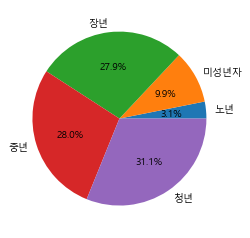

In [113]:
# 10. 나이분류를 파이차트로 표시하시요
res10 = titanic.groupby('나이분류').count()
plt.pie( res10['age'], labels=res10.index, autopct='%.1f%%')
plt.show()

In [119]:
# 11. 생존율이 가장 높은 나이분류를 구하시요
res11 = titanic.groupby('나이분류').mean()
res11[ res11['survived'] == res11['survived'].max()].index

Index(['미성년자'], dtype='object', name='나이분류')

In [138]:
# 12. 성별, 나이분류별, 등급(pclass)를 멀티인덱스로, 생존률을 값으로 표시하시요
# res12 = titanic[['sex', '나이분류', 'pclass', 'survived']]
# res12 = res12.pivot_table(index=['sex', '나이분류', 'pclass'])
# res12
titanic.groupby(['sex','나이분류','pclass']).mean()[ ['survived'] ]

survived
sex    나이분류 pclass          
female 노년   1       1.000000
            3       1.000000
       미성년자 1       0.666667
            2       1.000000
            3       0.461538
       장년   1       0.972222
            2       0.850000
            3       0.142857
       중년   1       1.000000
            2       0.920000
            3       0.500000
       청년   1       0.960000
            2       0.947368
            3       0.485714
male   노년   1       0.083333
            2       0.333333
            3       0.000000
       미성년자 1       1.000000
            2       1.000000
            3       0.291667
       장년   1       0.370370
            2       0.037037
            3       0.068182
       중년   1       0.571429
            2       0.090909
            3       0.197368
       청년   1       0.363636
            2       0.037037
            3       0.108911